## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [5]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [6]:
# Calculate value counts for the Survived column
data.Survived.value_counts()



0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [7]:
def missingness_summary(df, print_log=False, sort='none'):
    summary = df.apply(lambda x: x.isna().sum() / x.shape[0])
    
    if sort == 'none':
        summary = summary
    elif sort == 'ascending':
        summary = summary.sort_values()
    elif sort == 'descending':
        summary = summary.sort_values(ascending=False)
    else:
        print('Invalid value for sort parameter.')
    
    if print_log:
        print(summary)
        
    return summary

In [8]:
# Calculate NA values per column
print(missingness_summary(data))

clean_data = data.drop(columns=['Age', 'Cabin', 'Embarked'], axis=1)


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [9]:
missingness_summary(clean_data)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
dtype: float64

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [10]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'Age' has 88 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values
Column with name 'Cabin' has 147 unique values
Column with name 'Embarked' has 3 unique values


In [11]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
df = clean_data.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)



In [12]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [13]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
sex = pd.get_dummies(df['Sex'], drop_first=True)
X = pd.concat([df.drop(columns=['Survived', 'Sex'], axis=1), sex], axis=1)
y = df['Survived']



In [14]:
# Let's check the new columns
print(X.columns)
print(y)



Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [15]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:
knn = KNeighborsClassifier(n_neighbors=1)
fit = knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('train_score:', train_score)
print('test_score:', test_score)


train_score: 0.8665730337078652
test_score: 0.7374301675977654


Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [ ]:
# answer below:
# This absolutely overfits as it is only fitting to n=1 nearest neighbors


Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [17]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = list(range(1, 15, 2))
print(k_list)

[1, 3, 5, 7, 9, 11, 13]


For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [18]:
# answer below:
for k_values in k_list:
  knn = KNeighborsClassifier(n_neighbors=k_values)
  fit = knn.fit(X_train, y_train)
  accuracy_train.append(accuracy_score(y_train, knn.predict(X_train)))
  accuracy_test.append(accuracy_score(y_test, knn.predict(X_test)))
  f1_train.append(f1_score(y_train, knn.predict(X_train)))
  f1_test.append(f1_score(y_test, knn.predict(X_test)))

print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)


[0.8665730337078652, 0.8553370786516854, 0.8258426966292135, 0.8174157303370787, 0.8089887640449438, 0.7808988764044944, 0.7752808988764045]
[0.7374301675977654, 0.7541899441340782, 0.7318435754189944, 0.7541899441340782, 0.7430167597765364, 0.7374301675977654, 0.7318435754189944]
[0.8312611012433392, 0.7992202729044835, 0.7615384615384615, 0.7499999999999999, 0.7424242424242425, 0.6976744186046512, 0.7026022304832714]
[0.6845637583892618, 0.7066666666666667, 0.6712328767123288, 0.7027027027027026, 0.684931506849315, 0.6758620689655173, 0.6756756756756757]


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

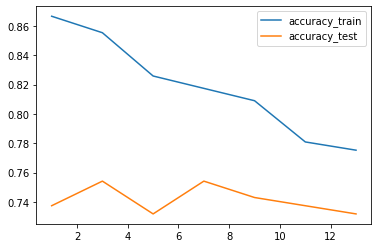

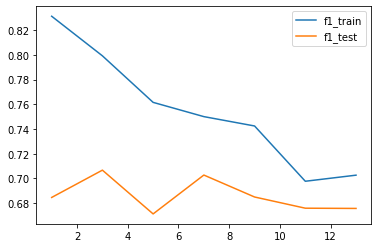

In [19]:
# answer below:
plt.figure()
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.legend(['accuracy_train', 'accuracy_test'])
plt.show()

plt.figure()
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.legend(['f1_train', 'f1_test'])
plt.show()

Please comment the results of the plots above

In [20]:
# Add your observations in comments below.
# It looks like accuracy for the test set increases for a while based on k nearest neighbors, but decreases after a while as well, indicating there is a best k value to choose for high accuracy
# this is also represented in the f1 scores, both seems to indicate a best k value of 7 n_neighbors
